# The Sparks Foundation - Data Science and Business Analytics Internship

# Performing K_means Clustering using Elbow Method 

### In this we will form clusters in the iris data using K-means 

In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
#to ignoring warning 
import warnings
warnings.filterwarnings('ignore')

In [21]:
#loading Dataset
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
iris_df=iris_df.drop(columns=['Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# to find no of rows 
len(iris_df)

150

In [24]:
#statical summary of the data
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
# to check null values
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# visualising the data

In [26]:
# to make correlation matrix
corr_matrix=iris_df.corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

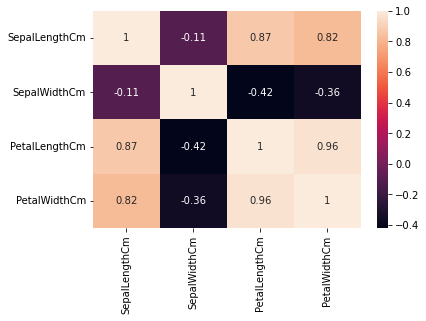

In [27]:
# heat map of the iris data
sns.heatmap(corr_matrix , annot=True)

Text(0, 0.5, 'SepalLengthCm')

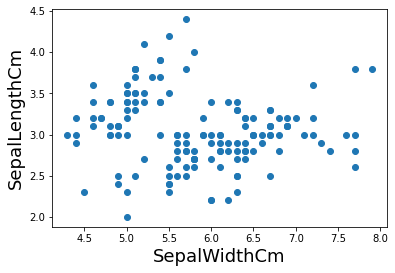

In [46]:
plt.scatter(x=iris_df['SepalLengthCm'], y=iris_df['SepalWidthCm'] , cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('SepalWidthCm', fontsize=18)
plt.ylabel('SepalLengthCm', fontsize=18)

Text(0, 0.5, 'PetalLengthCm')

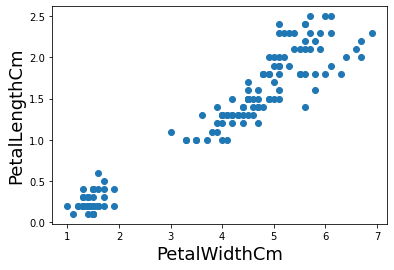

In [45]:
plt.scatter(x=iris_df['PetalLengthCm'], y=iris_df['PetalWidthCm'] , cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('PetalWidthCm', fontsize=18)
plt.ylabel('PetalLengthCm', fontsize=18)

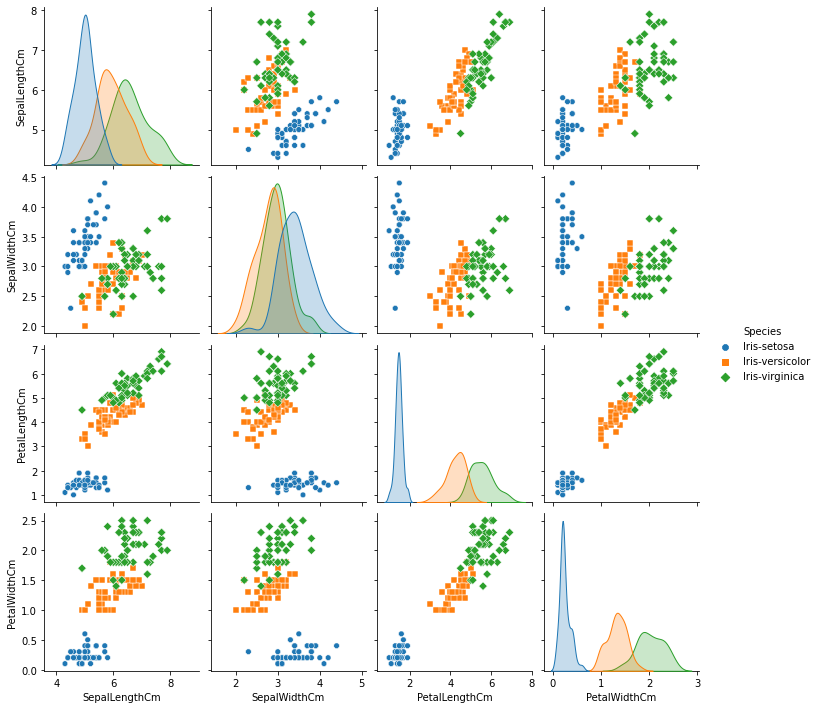

In [48]:
sns.pairplot(iris_df, hue='Species', height=2.5, markers = ["8","s","D"])

## Start Clustering process

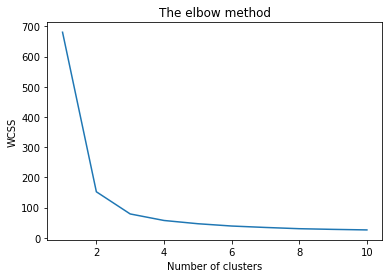

In [39]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [40]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [41]:
# centriod matrix
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

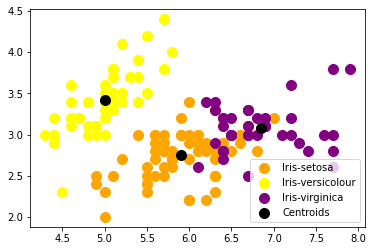

In [42]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()